In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv('Customer Churn.csv')

In [24]:
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


### Data Cleaning

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [26]:
column_names = {"Call  Failure":'call_failures', 'Complains':'complaint','Subscription  Length':'subscr_time',
                'Charge  Amount':'charge','Seconds of Use':'call_duration','Frequency of use':'total_n_calls',
                'Distinct Called Numbers':'distinct_call', 'Age Group':'age_group', 'Tariff Plan':'tariff',
                'Status':'status', 'Age':'age','Customer Value':'customer_value', 'Churn':'churn',
                'Frequency of SMS':'total_sms'
            }

data.rename(columns=column_names, inplace=True)

In [27]:
# 0 -> Pay as you go / 1 -> Contractual
data['tariff'].replace({1:0,2:1},inplace=True)

# 0 -> Non-active / 1 -> Active
data['status'].replace({2:0}, inplace= True)

In [28]:
data.describe()

,call_failures,complaint,subscr_time,charge,call_duration,total_n_calls,total_sms,distinct_call,age_group,tariff,status,age,customer_value,churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,0.077778,0.751746,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,0.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,0.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,0.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,1.000000,1.000000,55.000000,2165.280000,1.000000


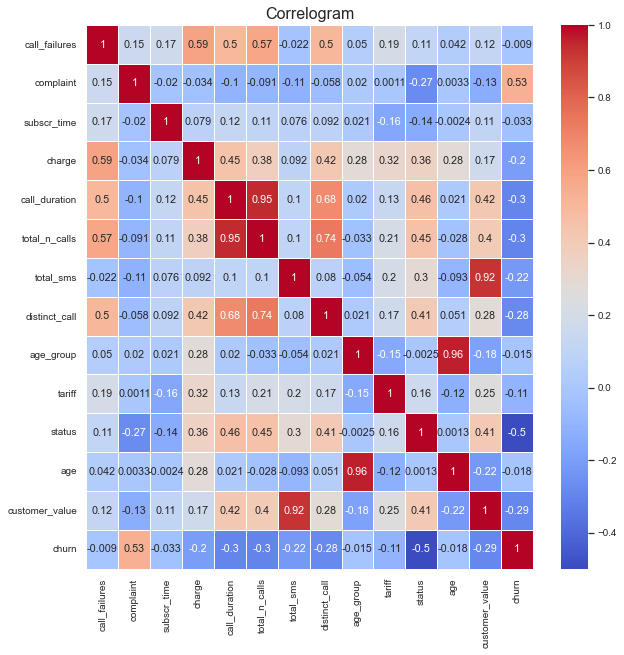

In [29]:
corr_matrix = data.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.9)

sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True, linewidths=1)
plt.title('Correlogram', fontsize=16)

plt.show()

### Short Analysis and Visualization

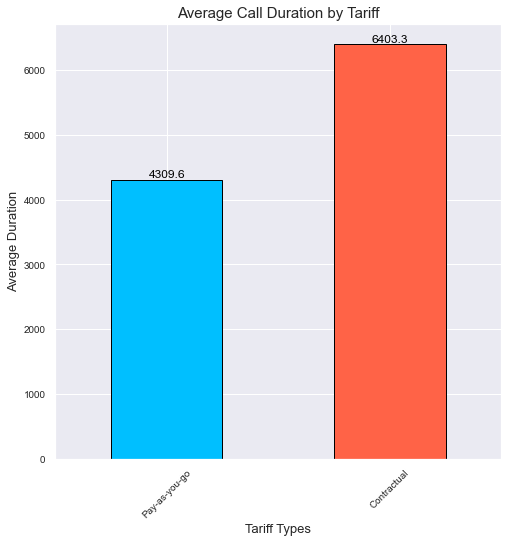

In [30]:
results_duration = data.groupby('tariff')['call_duration'].mean()

plt.figure(figsize=(8,8))

colors = ['deepskyblue', 'tomato']

ax = results_duration.plot(kind='bar', color=colors, edgecolor='black')

for i in ax.patches:
    heights=i.get_height()
    plt.annotate(f"{heights:.1f}", xytext=(0,5), xy=(i.get_x() + i.get_width()/2, heights),
                textcoords='offset points', ha='center', va='center',
                fontsize=12, color='black')
    
plt.title('Average Call Duration by Tariff', fontsize = 15)
plt.xlabel('Tariff Types', fontsize=13)
plt.ylabel('Average Duration', fontsize=13)

results_duration.index = results_duration.index.map({0: 'Pay-as-you-go', 1: 'Contractual'})
plt.xticks(range(len(results_duration.index)), results_duration.index, rotation=45)


plt.savefig('Average Call Duration.png')
plt.show()

##### Graph 1.
There is a visible difference of average call durations: contractual users tent to have more call duration than those who use the service as pay-as-you-go.

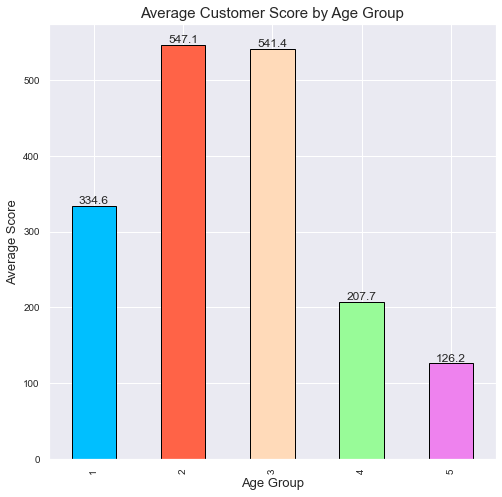

In [31]:
results_complaint = data.groupby('age_group')['customer_value'].mean()

plt.figure(figsize=(8,8))

colors=['deepskyblue','tomato','peachpuff','palegreen','violet']

bar = results_complaint.plot(kind='bar', color=colors, edgecolor='black')

for a in bar.patches:
    height=a.get_height()
    plt.annotate(f'{height:.1f}', xy=(a.get_x()+a.get_width()/2, height),
                 xytext=(0,5),textcoords='offset points',ha='center',va='center',
                fontsize=12)

plt.title('Average Customer Score by Age Group',fontsize=15)
plt.xlabel('Age Group',fontsize=13)
plt.ylabel('Average Score',fontsize=13)

plt.savefig('Average Customer Score.png')
plt.show()

##### Graph 2.
Consumers who are 16-30 years old tend to have more consumer score. The order is followed by those who are below 15. Consumers who are older than 31 usually have less consumer scores.

### Modelling

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [33]:
# Variable age is dropped because of age_group. total_sms and total_n_calls were causing multicollinarity (> 0.75)

X = data.drop(['churn','age','total_n_calls','total_sms'],axis=1)

y = data['churn']

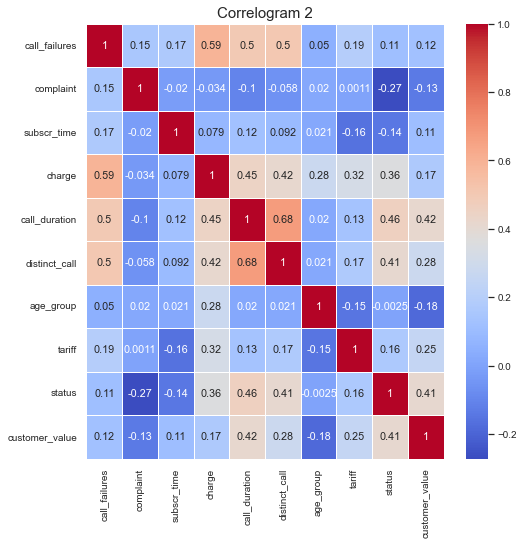

In [34]:
# Checking Multicollinarity
correlogram=X.corr()
correlogram

plt.figure(figsize=(8,8))
sns.heatmap(correlogram,cmap='coolwarm', annot=True,linewidths=1)

plt.title('Correlogram 2',fontsize=15)
plt.show()

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=44)

In [36]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

### Optimizing Models

Setting Hyperparameter Lists for both models

In [37]:
rf_hyperparameters = {
    'n_estimators': [50, 100, 125, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

gb_hyperparameters = {
    'n_estimators': [50, 100, 125, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [380]:
%%time

rf_grid = GridSearchCV(rf, rf_hyperparameters, cv=5)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_params_

gb_grid = GridSearchCV(gb, gb_hyperparameters, cv=5)
gb_grid.fit(X_train, y_train)

best_gb = gb_grid.best_params_

CPU times: total: 55min 11s
Wall time: 58min 59s


In [40]:
print(f'Best RF Hyperparameters: \n {best_rf}\n')
print(f'Best GB Hyperparameters: \n {best_gb}')

Best RF Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best GB Hyperparameters: 
 {'learning_rate': 0.2, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [41]:
RF = RandomForestClassifier(n_estimators= 200, criterion='entropy' , max_depth=20 , min_samples_split= 2,
                            min_samples_leaf= 1, max_features='log2' )

GB = GradientBoostingClassifier(n_estimators= 200, learning_rate =0.2 , max_depth=5 , min_samples_split= 5,
                                min_samples_leaf= 2, max_features=None )

In [42]:
RF.fit(X_train,y_train)
GB.fit(X_train,y_train)

pred_rf = RF.predict(X_test)
pred_gb = GB.predict(X_test)

# Quick Report
accuracy_rf = accuracy_score(y_test, pred_rf)
accuracy_gb = accuracy_score(y_test, pred_gb)

print('Accuracy RF:', accuracy_rf)
print('Accuracy GB:', accuracy_gb)

Accuracy RF: 0.9412698412698413
Accuracy GB: 0.946031746031746


In [43]:
# Detailed Report
report_rf = classification_report(y_test, pred_rf)
report_gb = classification_report(y_test, pred_gb)

print(f'Report RF: \n{report_rf}')
print('---------------------\n---------------------\n---------------------')
print(f'Report GB: \n{report_gb}')

Report RF: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       521
           1       0.87      0.78      0.82       109

    accuracy                           0.94       630
   macro avg       0.91      0.88      0.89       630
weighted avg       0.94      0.94      0.94       630

---------------------
---------------------
---------------------
Report GB: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       521
           1       0.88      0.80      0.84       109

    accuracy                           0.95       630
   macro avg       0.92      0.89      0.90       630
weighted avg       0.94      0.95      0.94       630



#### Model Analysis

After comparing the precision, recall, f1-score and weighted averages of the both models, it is obvious that Random Forest Classifier is slightly better than Gradient Boosting Classifier. Here is the interpretation:

If GB model shows that consumer will continue using the service of the company, it will be 96% accurate. However, out of all true cases model will find 98% of them.

If GB model shows that consumer will leave the company, it will be 88% true. However, only 80% of all true cases will be found by the model.

## Defining Function and Predicting Churn

In [45]:
def churn_prediction():
    df = pd.DataFrame()
 
    # Collection Information
    
    # Failure
    
    print('How many call failures have consumer faced?\n')
    failure = int(input())
    print('\n')
    
    # Complaint
    
    print('Have consumer complaint about any service before? \nYes = 1, No = 0\n')
    complaint = int(input())
    print('\n')
    
    # Subscription Lenght
    
    print("For how many months have consumer been using the company's service?")
    subs = int(input())
    print('\n')
    
    # Charge
    
    print("What is the consumer's charge amount? \nLowest - 1, Highest - 9")
    charge = int(input())
    print('\n')
    
    # Call Duration
    
    print('What is the total call duration of the consumer?')
    duration = int(input())
    print('\n')
    
    # Distinct Calls
    
    print('How many distinct numbers did consumer call?')
    distinct = int(input())
    print('\n')
    
    # Age Group
    
    print('Which age group does consumer belong? \n 15 or below: 1 \n 16-25: 2 \n 26-30: 3 \n 31-45: 4 \n 46 or older: 5')
    age = int(input())
    print('\n')
    
    # Tariff
    
    print('Does consumer have contract or use pay-as-you-go? \n Pay-as-you-go: 0 \n Contractual: 1')
    tariff = int(input())
    print('\n')
    
    # Status
    
    print("What is consumer's current status? \n Not Active = 0 \n Active = 1")
    status = int(input())
    print('\n')
    
    # Consumer Value
    
    print('Please, enter the consumer value: \nUse dot(.) and NOT comma(,) to separate numbers. ')
    value = float(input())
    
    df = df.append({
        'call_failures': failure,
        'complaint': complaint,
        'subscr_time': subs,
        'charge': charge,
        'call_duration': duration,
        'distinct_call':distinct,
        'age_group':age,
        'tariff':tariff,
        'status':status,
        'customer_value':value
    }, ignore_index = True)
    
    tester = df[['call_failures','complaint','subscr_time',
                'charge','call_duration','distinct_call',
                'age_group','tariff', 'status', 'customer_value']]
    
    print('------------------------------------------------------------')
    
    
    if GB.predict(tester)[0] == 0:
        return print('The consumer will stay.')
    else:
        return print('The consumer will not stay.')

In [390]:
churn_prediction()

How many call failures have consumer faced?

41


Have consumer complaint about any service before? 
Yes = 1, No = 0

1


For how many months have consumer been using the company's service?
36


What is the consumer's charge amount? 
Lowest - 1, Highest - 9
5


What is the total call duration of the consumer?
643


How many distinct numbers did consumer call?
51


Which age group does consumer belong? 
 15 or below: 1 
 16-25: 2 
 26-30: 3 
 31-45: 4 
 46 or older: 5
4


Does consumer have contract or use pay-as-you-go? 
 Pay-as-you-go: 0 
 Contractual: 1
0


What is consumer's current status? 
 Not Active = 0 
 Active = 1
1


Please, enter the consumer value: 
Use dot(.) and NOT comma(,) to separate numbers. 
175.2
------------------------------------------------------------
The consumer will not stay.


C:\Users\lenov\AppData\Local\Temp\ipykernel_14708\630685134.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
